<a href="https://colab.research.google.com/github/avneet007e/A-simple-Calculator/blob/master/ml_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression

In [2]:
df1=pd.read_csv('house.csv')
df1.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


In [3]:
df1.shape

(7251, 5)

In [4]:
dummies=pd.get_dummies(df1.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df2=pd.concat([df1,dummies.drop('other',axis='columns')],axis='columns')
df2.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df3 = df2.drop('location',axis='columns')
df3.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df3.total_sqft.describe()

count     7251.000000
mean      1470.453123
std        815.018423
min        300.000000
25%       1092.000000
50%       1255.000000
75%       1654.000000
max      30000.000000
Name: total_sqft, dtype: float64

## **SQUARE_FEET** **AND** **PRICE** **ANALYSIS**

In [20]:
 X= df3.iloc[:50 , 0].values
X


array([2850., 1630., 1875., 1200., 1235., 2750., 2450., 1875., 1500.,
       2065., 2059., 1394., 1077., 1566.,  840., 1590., 2180., 1180.,
       1200., 1394., 2077., 1205.,  900., 1450., 1150., 1350., 1350.,
        900., 1681., 1350., 1150., 1500., 1350., 1200., 1500., 1206.,
       1270., 1312., 1100., 3600., 5100., 1075., 1150., 1256., 1207.,
       1725., 1440., 1700., 2500.,  600.])

In [21]:
X.shape

(50,)

In [22]:
y = df3.iloc[:50 , 2].values
y


array([428.  , 194.  , 235.  , 130.  , 148.  , 413.  , 368.  , 167.  ,
        85.  , 210.  , 225.  , 100.  ,  93.  , 180.  ,  50.  , 131.  ,
       210.  ,  88.5 ,  86.  ,  85.  , 175.  ,  85.  ,  75.  ,  50.75,
        40.25,  47.25,  47.25,  41.  ,  69.  ,  47.25,  40.25, 220.  ,
       200.  , 225.  , 230.  ,  56.  ,  70.  ,  69.  ,  48.  , 130.  ,
       300.  ,  60.  ,  52.5 ,  62.8 ,  63.  , 100.  ,  60.  , 100.  ,
       110.  ,  30.  ])

In [23]:
real_x = X.reshape(-1 , 1)
real_y = y.reshape(-1, 1)

### Linear Regression

In [ ]:
lin = LinearRegression()
lin.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

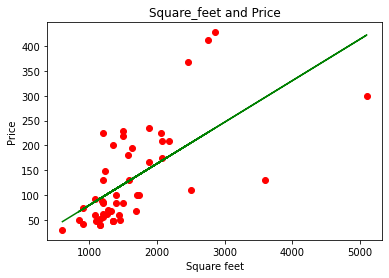

In [ ]:
plt.scatter(real_x , real_y ,color="red")
plt.plot(real_x , lin.predict(real_x) , color="green")
plt.title("Square_feet and Price")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

In [ ]:
lin.score(real_x,real_y)

0.41934010567279767

### Polynomial Regression (At different dergrees)

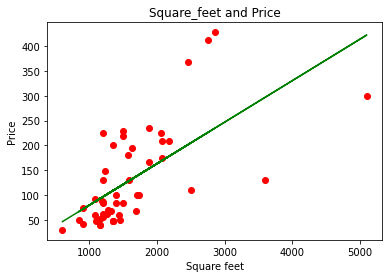

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 1)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'red')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Price")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

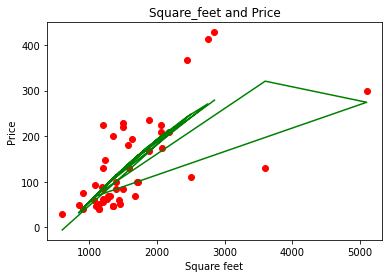

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'red')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Price")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

In [ ]:
lin2.score(x_poly,real_y)

0.5178723162982345

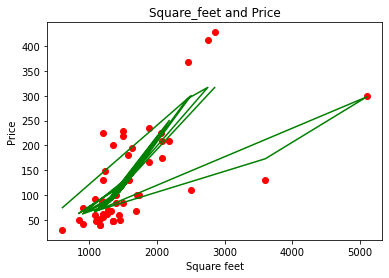

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'red')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Price")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

### Random forest Regression

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(real_x, real_y, test_size=0.2, random_state=7)

In [63]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [64]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  62.81286477773288


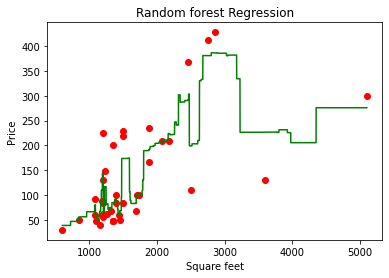

In [66]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train , y_train , color = 'red')
plt.plot(X_grid, model.predict(X_grid),  
         color = 'green')  
plt.title("Random forest Regression")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

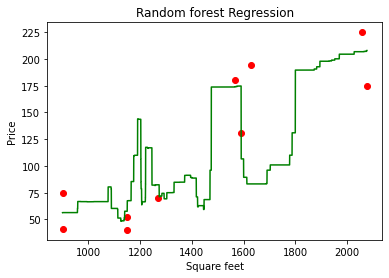

In [67]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test , y_test , color = 'red')
plt.plot(X_grid, model.predict(X_grid),  
         color = 'green')  
plt.title("Random forest Regression")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

## **BHK** **AND** **PRICE** **ANALYSIS**

In [130]:
X = df3.iloc[:500 , 3].values


In [131]:
y = df3.iloc[:500 , 2].values



In [132]:
real_x = X.reshape(-1 , 1)
real_y = y.reshape(-1, 1)

### Linear Regression

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(real_x, real_y, test_size=0.2)

In [158]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

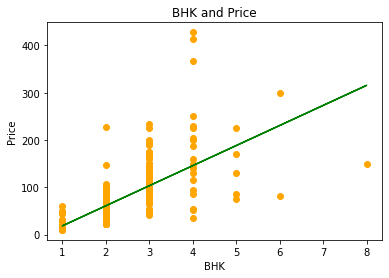

In [160]:
plt.scatter(X_train , y_train ,color="orange")
plt.plot(X_train, lin.predict(X_train) , color="green")
plt.title("BHK and Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()


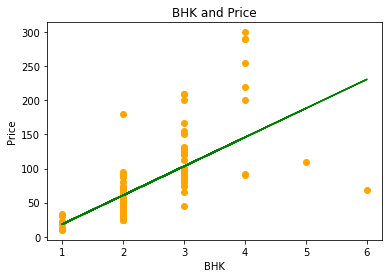

In [161]:
plt.scatter(X_test , y_test ,color="orange")
plt.plot(X_test, lin.predict(X_test) , color="green")
plt.title("BHK and Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

In [159]:
lin.score(X_test,y_test)

0.44689240117273715

### Polynomial Regression (At different dergrees)

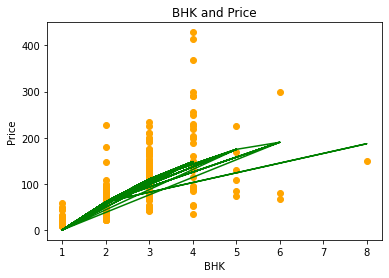

In [162]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'orange')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("BHK and Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

In [163]:
lin2.score(x_poly,real_y)

0.4801897746621582

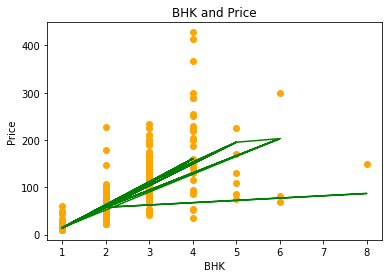

In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'orange')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("BHK and Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

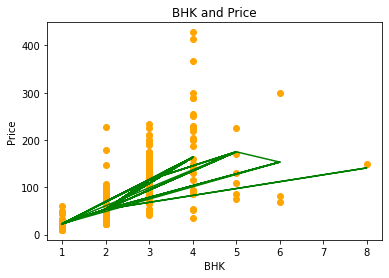

In [165]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'orange')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("BHK and Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

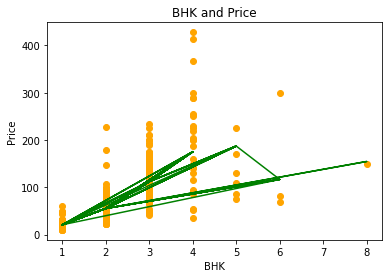

In [166]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'orange')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("BHK and Price")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

### Random forest Regression

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(real_x, real_y, test_size=0.5)

In [170]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [171]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [172]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  49.70140929493927


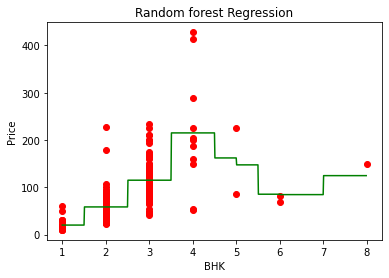

In [173]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train , y_train , color = 'red')
plt.plot(X_grid, model.predict(X_grid),  
         color = 'green')  
plt.title("Random forest Regression")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

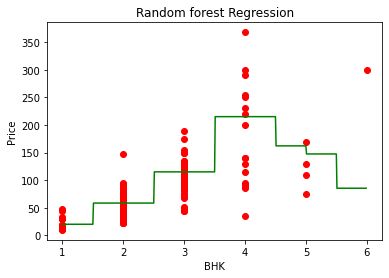

In [174]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test , y_test , color = 'red')
plt.plot(X_grid, model.predict(X_grid),  
         color = 'green')  
plt.title("Random forest Regression")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()

## **Total_sqft** **vs** 	**bath** **Analysis**

In [101]:
X = df3.iloc[:500 , 0].values


In [102]:
y = df3.iloc[:500 , 3].values


In [103]:
real_x = X.reshape(-1 , 1)
real_y = y.reshape(-1, 1)

### Linear Regression

In [ ]:
lin = LinearRegression()
lin.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

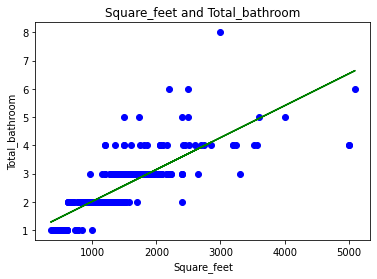

In [ ]:
plt.scatter(real_x , real_y ,color="blue")
plt.plot(real_x , lin.predict(real_x) , color="green")
plt.title("Square_feet and Total_bathroom")
plt.xlabel("Square_feet")
plt.ylabel("Total_bathroom")
plt.show()


In [ ]:
lin.score(real_x,real_y)

0.6478852916597415

### Polynomial Regression (At different dergrees)

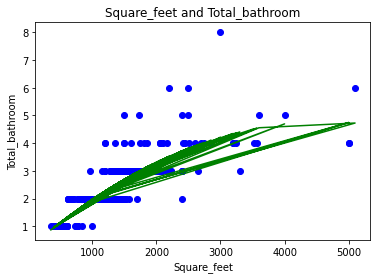

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'blue')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Total_bathroom")
plt.xlabel("Square_feet")
plt.ylabel("Total_bathroom")
plt.show()

In [ ]:
lin2.score(x_poly,real_y)

0.7026007390658809

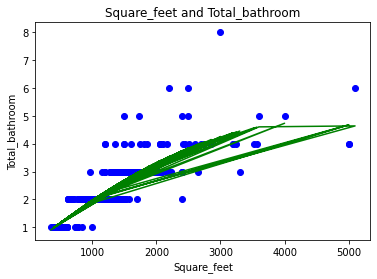

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'blue')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Total_bathroom")
plt.xlabel("Square_feet")
plt.ylabel("Total_bathroom")
plt.show()

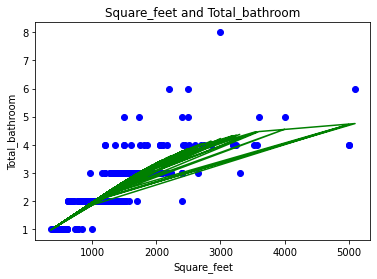

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'blue')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Total_bathroom")
plt.xlabel("Square_feet")
plt.ylabel("Total_bathroom")
plt.show()

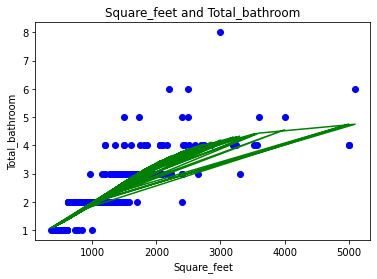

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(real_x)
poly.fit(x_poly , real_y)

lin2 = LinearRegression()
lin2.fit(x_poly , real_y)

plt.scatter(real_x , real_y , color = 'blue')
plt.plot(real_x , lin2.predict(poly.fit_transform(real_x)) , color="green")
plt.title("Square_feet and Total_bathroom")
plt.xlabel("Square_feet")
plt.ylabel("Total_bathroom")
plt.show()

### Random forest Regression

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(real_x, real_y, test_size=0.4,random_state=10)

In [123]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [124]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  71.83298514513096


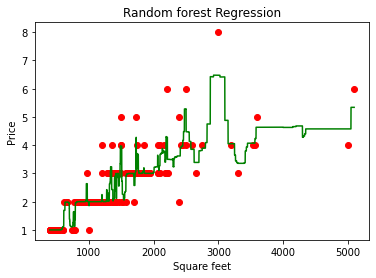

In [126]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train , y_train , color = 'red')
plt.plot(X_grid, model.predict(X_grid),  
         color = 'green')  
plt.title("Random forest Regression")
plt.xlabel("Square feet")
plt.ylabel("Price")
plt.show()

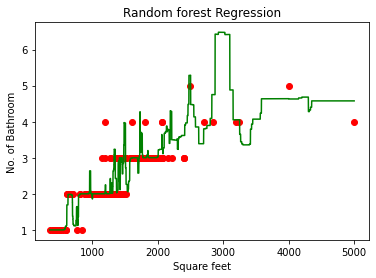

In [127]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test , y_test , color = 'red')
plt.plot(X_grid, model.predict(X_grid),  
         color = 'green')  
plt.title("Random forest Regression")
plt.xlabel("Square feet")
plt.ylabel("No. of Bathroom")
plt.show()

## **Multiple** **Variable** **linear** **regression**

In [ ]:
X=df3.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df3.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)

0.8541850010771194

In [ ]:
X_train.values.reshape(-1,1)
y_train.values.reshape(-1,1)


array([[105.],
       [224.],
       [145.],
       ...,
       [ 40.],
       [215.],
       [ 35.]])

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677176957

In [ ]:
data=pd.read_csv('house.csv')
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2
